In [1]:
import tweepy
import re
import pickle

from tweepy import OAuthHandler


In [2]:

#Please change with your own consumer key, consumer secret, access token and access secret
# Initializing the keys
consumer_key = '2FwDCiX4sWxXeiZiOUvh9852G'
consumer_secret = 'hp1nnF8e33RcJt3C7pxBFhPJBifj0mBXsoykXmb0txiTVv9rYx'
access_token = '1066673840896397314-eIIrdKujAHB8LL5ULCmL5xc1WAir2C'
access_secret ='7L8Jl8bKk0n4ZoLppUvF4qBsKSMesEUSMSWDmR8fm110R'


In [28]:

# Initializing the tokens
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
args = ['nokia'];
api = tweepy.API(auth, timeout=10)


In [29]:
# Fetching the tweets
list_tweets = []

query = args[0]
if len(args) == 1:
    for status in tweepy.Cursor(api.search,q=query+" -filter:retweets",lang='en',result_type='recent',geocode="22.1568,89.4332,500km").items(100):
        list_tweets.append(status.text)

In [30]:

# Loading the vectorizer and classfier
with open('classifier.pickle','rb') as f:
    classifier = pickle.load(f)

with open('tfidfmodel.pickle','rb') as f:
    tfidf = pickle.load(f)

total_pos = 0
total_neg = 0


In [31]:
# Preprocessing the tweets and predicting sentiment
for tweet in list_tweets:
    tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ", tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"that's","that is",tweet)
    tweet = re.sub(r"there's","there is",tweet)
    tweet = re.sub(r"what's","what is",tweet)
    tweet = re.sub(r"where's","where is",tweet)
    tweet = re.sub(r"it's","it is",tweet)
    tweet = re.sub(r"who's","who is",tweet)
    tweet = re.sub(r"i'm","i am",tweet)
    tweet = re.sub(r"she's","she is",tweet)
    tweet = re.sub(r"he's","he is",tweet)
    tweet = re.sub(r"they're","they are",tweet)
    tweet = re.sub(r"who're","who are",tweet)
    tweet = re.sub(r"ain't","am not",tweet)
    tweet = re.sub(r"wouldn't","would not",tweet)
    tweet = re.sub(r"shouldn't","should not",tweet)
    tweet = re.sub(r"can't","can not",tweet)
    tweet = re.sub(r"couldn't","could not",tweet)
    tweet = re.sub(r"won't","will not",tweet)
    tweet = re.sub(r"\W"," ",tweet)
    tweet = re.sub(r"\d"," ",tweet)
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)
    sent = classifier.predict(tfidf.transform([tweet]).toarray())
    if sent[0] == 1:
        total_pos += 1
    else:
        total_neg += 1


In [32]:
print(list_tweets)

['OPPO R15, Nokia 9 PureView, Moto Razor 2019 Latest Updates, Leaks, Specs, Launch Date in\xa0India|Hindi… https://t.co/UA6krRd2rL', '@mehta_ajey @BTVI Congratulations Sir really Proud of you the way you bring back Nokia backs was absolutely amazing… https://t.co/5ytkjOcjli', 'Live@Nokia 7 plus with Shillong Chamber Choir in Guwahati https://t.co/tVo1B5zEe6', '@NokiamobileIN when Nokia 7 plus will get February Android security patch update...today is 17th Feb...within next… https://t.co/mMotyfLh6w', '@geet0212 https://t.co/Fet2Ay3Ml4\nJust give it a look. Looks like the ones in fashion today. 😊. I use one.', '@geet0212 Nokia. The new ones are like the tanks like the olden days. I use one.', '@mehta_ajey @BTVI We are waiting for that day when nokia again comes on top levels', "@geekyranjit #AskGeekyRanjit Sir, i want to gift my dad a phone on his birthday. I'm planning to buy Nokia 5.1 plus… https://t.co/e75iIpeu1w", '#AskGeekyRanjit @geekyranjit What are your thoughts on Nokia 9 and 6.

In [33]:
# Visualizing the results
import matplotlib.pyplot as plt
import numpy as np
objects = ['Positive','Negative']
y_pos = np.arange(len(objects))


Text(0.5,1,'Number of Postive and NEgative Tweets')

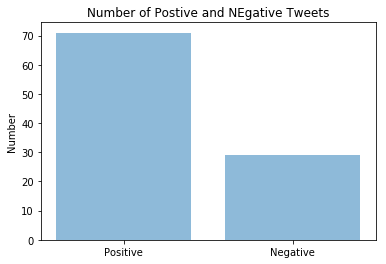

In [34]:

plt.bar(y_pos,[total_pos,total_neg],alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Number')
plt.title('Number of Postive and NEgative Tweets')


In [35]:
print(total_neg)
print("------")
print(total_pos)

29
------
71
